# Модель вакцинации

## Описание модели

Пусть $N$ – население закрытого города N, жители которого не размножаются и не умирают от старости. В городе бушует эпидемия covid-19. К счастью учёные города разработали надёжную вакцину от коронавирусной инфекции. Жители разделились на две половины: те, кто считает, что вакцинироваться необходимо (они вакцинируются, как только примыкают к данной группе жителей), и те, кто считает, что вакцина – это зло. Коронавирус – страшная болезнь, поэтому непривитые жители постепенно умирают от болезни. 

Пусть $V$ – количество привитых граждан, $D$ – количество погибших от инфекции и $M$ (от англ. moron – идиот) – covid-идиоты. Относительные показатели: 

$$v = \frac{V}{N}, \qquad v \in [0, 1]$$

$$d = \frac{D}{N}, \qquad d \in [0, 1]$$

$$m = \frac{M}{N}, \qquad m \in [0, 1]$$

Зависимости между выделенными накопителями следующие: 
1) Каждый день умирает фиксированная доля $\alpha$ невакцинированных жителей города

$$d'(t) = \alpha \, m(t)$$

2) Количество желающих привиться увеличивается из двух источников: привитые активно призывают привиться всех остальных, новости о количестве погибших мотивируют covid-идиотов прививаться. 

$$v'(t) = \beta \, v(t) \, m(t) + \gamma \, d(t) \, m(t)$$

3) Непосредственно из первых двух уравнений находим 

$$m'(t) = - \alpha \, m(t) - \beta \, v(t) \, m(t) - \gamma \, d(t) \, m(t)$$

## Реализация модели

Импортируем инструменты

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from dsolvemethods import CauchyProblem, RungeKutta, VectorFunction

Задаём параметры модели

In [2]:
alpha = 0.01
beta = 0.05
gamma = 0.03

Задаём систему уравнений полагая 

$$y = (v, m, d)^T$$

In [3]:
f = VectorFunction(
    [
        lambda t, y: beta * y[0] * y[1] + gamma * y[1] * y[2], 
        lambda t, y: - alpha * y[1] - beta * y[0] * y[1] - gamma * y[1] * y[2],
        lambda t, y: alpha * y[1]
    ]
)

Задаём начальные параметры: будем считать, что изначально $M = N, V = D = 0$

In [4]:
model = CauchyProblem(f, 0.0, np.array([0.0, 1.0, 0.0]))

Инициализируем солвер и строим траектории $y$ для четырёх месяцев. 

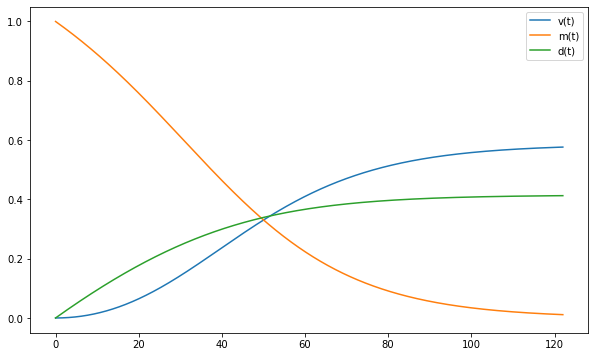

Wall time: 4.87 s


In [5]:
%%time

days_in_four_month = 30 + 31 + 30 + 31
rk = RungeKutta(h=0.001)
args, values = rk.solve(model, days_in_four_month)

plt.figure(figsize=(10, 6))
plt.plot(args, values[:, 0], label='v(t)')
plt.plot(args, values[:, 1], label='m(t)')
plt.plot(args, values[:, 2], label='d(t)')
plt.legend()
plt.show()

Посмотрим, к каким результатам мы пришли:

In [6]:
print(
    "Доля вакцинировавшихся: {:10.4f}".format(values[-1, 0]), 
    "Доля covid-идиотов: {:10.4f}".format(values[-1, 1]),
    "Доля погибших: {:10.4f}".format(values[-1, 2]),
    sep='\n'
)

Доля вакцинировавшихся:     0.5763
Доля covid-идиотов:     0.0112
Доля погибших:     0.4125
